<a href="https://colab.research.google.com/github/Ali-mohammadi-design/TensorFlow/blob/main/Tensorflow_Early_stopping_AND_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

Note: We can automatically prevent the model to go further when it comes to over fitting.  

In [2]:
df=pd.read_csv('/content/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

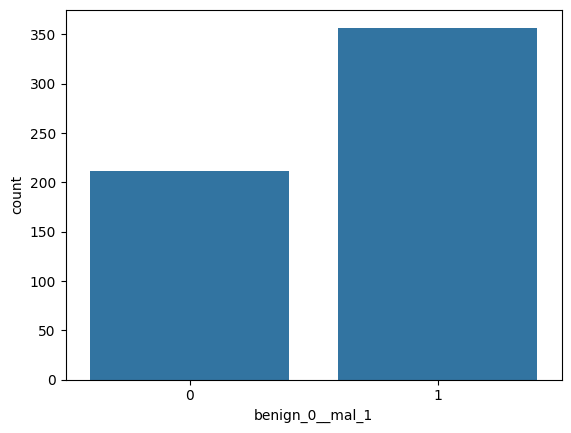

In [12]:
sns.countplot(x='benign_0__mal_1', data=df)

In [29]:
df.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

Note: We can sort them.

In [14]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

Note: We can also show it with plot.

<Axes: >

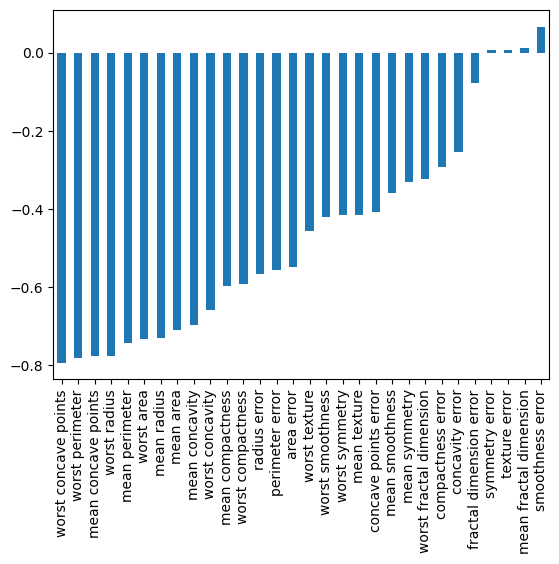

In [30]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

Note: We can also see the heatmap plot of the corrolation.

<Axes: >

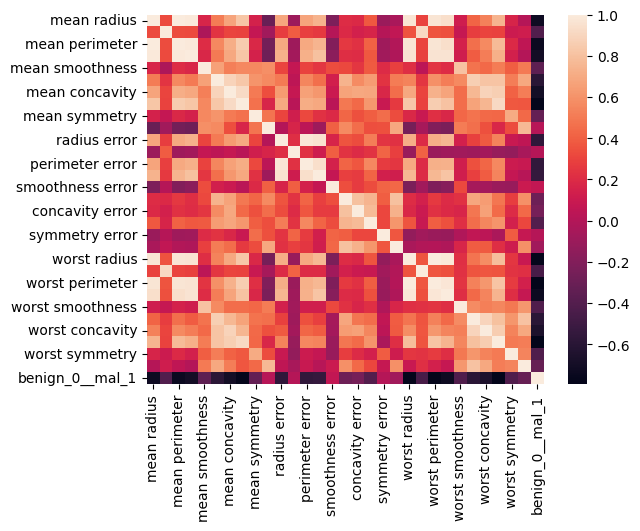

In [31]:
sns.heatmap(df.corr())

In [41]:
x=df.drop('benign_0__mal_1', axis=1).values
y=df['benign_0__mal_1'].values

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler=MinMaxScaler()

In [47]:
X_train=scaler.fit_transform(X_train)

In [48]:
X_test=scaler.fit_transform(X_test)

In [52]:
from tensorflow.keras.models import Sequential

In [53]:
from tensorflow.keras.layers import Dense, Dropout

In [54]:
X_train.shape

(426, 30)

In [58]:
model=Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

Note: For the binary classification the activation for the last layer is sigmoid

In [59]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 2s 20ms/step - loss: 0.6701 - val_loss: 0.6525
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6293 - val_loss: 0.6091
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5865 - val_loss: 0.5546
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5318 - val_loss: 0.4906
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4748 - val_loss: 0.4317
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4235 - val_loss: 0.3776
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3731 - val_loss: 0.3319
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3329 - val_loss: 0.2964
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2968 - val_loss: 0.2679
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2703 - val_loss: 0.2413
Epoch 11

In [60]:
losses=pd.DataFrame(model.history.history)

In [62]:
losses.head()

,loss,val_loss
0,0.670139,0.652476
1,0.629312,0.609052
2,0.586538,0.554610
3,0.531833,0.490577
4,0.474775,0.431691


<Axes: >

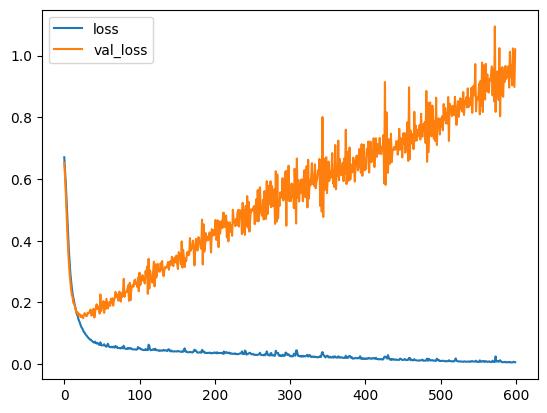

In [63]:
losses.plot()

As is clear here we have overfitting!!

Note: we can automatically stop overfitting!

In [64]:
model=Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
#help(EarlyStopping)

Note: You can read the help of EarlyStopping. We can stop the model based on reaching max or min of accuracy or other options.

In [69]:
early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

Note: patience =25 means after getting the overfitting we continue for 25 epochs and then we would stop. Sometimes we have some noises. It can prevent form the influence of the noise on the model.

In [70]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 19ms/step - loss: 0.6757 - val_loss: 0.6477
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6196 - val_loss: 0.5859
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5684 - val_loss: 0.5291
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5169 - val_loss: 0.4760
Epoch 5/600
14/14 [==============================] - 0s 10ms/step - loss: 0.4696 - val_loss: 0.4233
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4218 - val_loss: 0.3757
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3807 - val_loss: 0.3358
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3414 - val_loss: 0.2992
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3065 - val_loss: 0.2727
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2797 - val_loss: 0.2463
Epoch 1

Note: As is clear after 55 epochs it get stopped.

<Axes: >

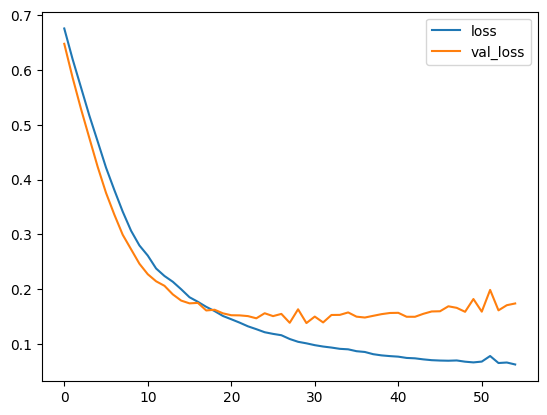

In [72]:
losses=pd.DataFrame(model.history.history)
losses.plot()

As is clear both loss and val loss are in the same behavior and getting low. At the moment that val_loss is increasing it sops.

Note: We can also add dropout layers to increase the accuaracy of the model. The dropout layers would drop percentage of the layers in each bach in every epoch that could increase the accuracy of the model. dropout =1 means all the cells would be dropped and dropout= 0.3 means only 30 percent of them would be randomly dropped.

In [73]:
from tensorflow.keras.layers import Dropout

In [77]:
model=Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass.

As a neural network learns, neuron weights settle into their context within the network. Weights of neurons are tuned for specific features, providing some specialization. Neighboring neurons come to rely on this specialization, which, if taken too far, can result in a fragile model too specialized for the training data. This reliance on context for a neuron during training is referred to as complex co-adaptations.

You can imagine that if neurons are randomly dropped out of the network during training, other neurons will have to step in and handle the representation required to make predictions for the missing neurons. This is believed to result in multiple independent internal representations being learned by the network.

The effect is that the network becomes less sensitive to the specific weights of neurons. This, in turn, results in a network capable of better generalization and less likely to overfit the training data.

In [78]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6659 - val_loss: 0.6401
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6468 - val_loss: 0.6171
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6269 - val_loss: 0.5897
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6159 - val_loss: 0.5632
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5752 - val_loss: 0.5335
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5612 - val_loss: 0.5018
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5327 - val_loss: 0.4673
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4872 - val_loss: 0.4307
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4879 - val_loss: 0.3952
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4523 - val_loss: 0.3659
Epoch 11

<Axes: >

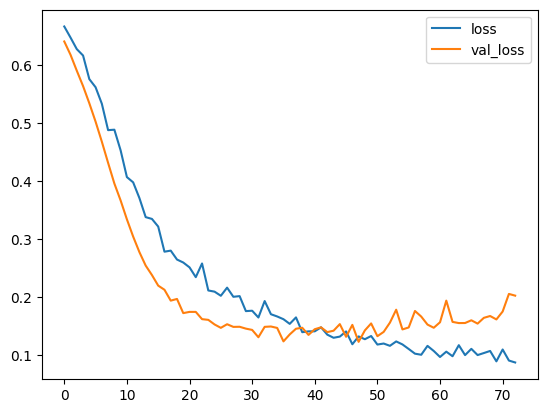

In [79]:
losses=pd.DataFrame(model.history.history)
losses.plot()

Note: As is clear it has a better behaviour.

Let's do the evaluation

The following code would retrun the 0 or 1. Since on prediction we need 0 or 1 only.

In [91]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
#predictions

5/5 [==============================] - 0s 4ms/step


In [93]:
from sklearn.metrics import classification_report, confusion_matrix

In [94]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        55
           1       0.99      0.88      0.93        88

    accuracy                           0.92       143
   macro avg       0.91      0.93      0.91       143
weighted avg       0.93      0.92      0.92       143



In [95]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [11 77]]
